## POSTTEST 2

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
df = pd.read_csv('peminjaman_buku_perpustakaan.csv')

In [146]:
display(df.describe())

,Book_Code,Year_Published,Pages,ID_Anggota Peminjam
count,1323.000000,1323.000000,1323.000000,1318.000000
mean,660.388511,1926.708239,311.789116,124555.438543
std,381.140192,116.104690,189.855906,385.187241
min,1.000000,400.000000,-1.000000,123877.000000
25%,330.500000,1905.000000,180.000000,124223.250000
50%,661.000000,1964.000000,274.000000,124552.500000
75%,989.500000,1988.000000,385.500000,124881.750000
max,1321.000000,2050.000000,1664.000000,125196.000000


Berdasarkan hasil statistik deskriptif yang telah ditampilkan, dapat disimpulkan hal-hal berikut mengenai attribute bertipe angka (Book_Code, Year_Published, Pages, dan ID_Anggota Peminjam):

Rata-rata (Mean): Menunjukkan nilai pusat dari masing-masing attribute. Sebagai contoh, rata-rata tahun terbit buku adalah sekitar 1926, dan rata-rata jumlah halaman buku adalah sekitar 311.

Standar Deviasi (Std): Mengukur sebaran atau dispersi data dari rata-ratanya. Standar deviasi yang tinggi menunjukkan sebaran data yang lebih luas, seperti pada Year_Published (116.10) dan Pages (189.85), mengindikasikan variasi yang signifikan dalam tahun terbit dan jumlah halaman buku.

Nilai Minimum (Min) dan Maksimum (Max): Menunjukkan rentang nilai untuk setiap attribute. Terdapat nilai minimum yang tidak wajar pada Pages (-1) dan Year_Published (400), yang mungkin menandakan adanya data yang perlu dibersihkan.

Kuartil (Q1, Q2/Median, Q3): Memberikan informasi tentang distribusi data. Q2 (Median) menunjukkan nilai tengah. Perbedaan antara Q3 dan Q1 (Interquartile Range/IQR) memberikan gambaran sebaran 50% data di tengah.

In [147]:
numerical_cols = df.select_dtypes(include=['int64','float64'])
display(df[numerical_cols.columns].head(10))

,Book_Code,Year_Published,Pages,ID_Anggota Peminjam
0,911,1781,606,123894.0
1,882,1956,146,123881.0
2,102,1884,288,123878.0
3,378,1933,115,123879.0
4,842,1596,146,123880.0
5,850,1958,206,123877.0
6,1301,1932,199,123882.0
7,1310,1964,174,123883.0
8,1105,1949,389,123884.0
9,1293,1962,164,123885.0


Dari tampilan 10 record pertama attribute bertipe angka (Book_Code, Year_Published, Pages, dan ID_Anggota Peminjam), dapat diamati beberapa hal awal:

Variasi Nilai: Terlihat adanya variasi nilai pada setiap attribute di baris-baris awal. Book_Code dan ID_Anggota Peminjam menunjukkan nilai yang berbeda untuk setiap record, yang diharapkan karena keduanya merupakan identifikasi unik. Year_Published dan Pages juga bervariasi, menunjukkan bahwa 10 buku pertama dalam sampel ini memiliki tahun terbit dan jumlah halaman yang berbeda-beda.

Rentang Nilai Awal: Nilai-nilai pada 10 record pertama memberikan gambaran awal tentang rentang data yang ada. Misalnya, tahun terbit berkisar dari tahun 1596 hingga 1964 dalam sampel kecil ini, dan jumlah halaman berkisar dari 115 hingga 606.

Data yang Tampak Wajar: Secara umum, nilai-nilai yang muncul pada 10 record pertama ini tampak wajar (kecuali mungkin Year_Published 1596 yang cukup tua, namun masih dalam batas logis untuk tahun terbit buku). Belum terlihat adanya nilai yang jelas-jelas anomali atau tidak masuk akal dari sampel awal ini, meskipun analisis statistik deskriptif sebelumnya menunjukkan adanya nilai -1 pada Pages dan 400 pada Year_Published di dataset keseluruhan.

In [148]:
display(df.info())
numerical_column_count = df.select_dtypes(include=['number']).shape[1]
print(f"Jumlah kolom numerik: {numerical_column_count}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323 entries, 0 to 1322
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Book_Code             1323 non-null   int64  
 1   Book_Title            1320 non-null   object 
 2   Author                1323 non-null   object 
 3   Year_Published        1323 non-null   int64  
 4   Pages                 1323 non-null   int64  
 5   ID_Peminjaman         1320 non-null   object 
 6   Tanggal_Peminjaman    1323 non-null   object 
 7   Tanggal_Pengembalian  1323 non-null   object 
 8   ID_Anggota Peminjam   1318 non-null   float64
 9   Nama_Anggota          1320 non-null   object 
 10  Alamat                1323 non-null   object 
 11  No.Telepon            1320 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 124.2+ KB


None

Jumlah kolom numerik: 4


Berdasarkan informasi dataset yang telah ditampilkan:

- Dataset ini terdiri dari 1323 record (baris), yang merupakan jumlah entri data yang dianalisis.
- Dataset memiliki total 12 attribute (kolom), yang merepresentasikan berbagai karakteristik dari setiap record.
- Nama-nama attribute meliputi Book_Code, Book_Title, Author, Year_Published, Pages, ID_Peminjaman, Tanggal_Peminjaman, Tanggal_Pengembalian, ID_Anggota Peminjam, Nama_Anggota, Alamat, dan No.Telepon. Attribute-attribute ini mencakup informasi tentang buku, detail peminjaman, dan data anggota.
- Terdapat 4 attribute yang bertipe angka (int64 atau float64), yaitu Book_Code, Year_Published, Pages, dan ID_Anggota Peminjam. Attribute lainnya bertipe object, yang umumnya merepresentasikan data tekstual atau kategorikal.

In [149]:
object_cols = df.select_dtypes(include=['object'])
for col in object_cols.columns:
    print(f"Column '{col}': {object_cols[col].nunique()} unique values")

Column 'Book_Title': 1304 unique values
Column 'Author': 965 unique values
Column 'ID_Peminjaman': 1320 unique values
Column 'Tanggal_Peminjaman': 301 unique values
Column 'Tanggal_Pengembalian': 63 unique values
Column 'Nama_Anggota': 1316 unique values
Column 'Alamat': 489 unique values
Column 'No.Telepon': 1318 unique values


Analisis jumlah nilai unik (label) pada attribute bertipe object memberikan wawasan mengenai keragaman data kategorikal dalam dataset:

- Attribute seperti Book_Title, Author, ID_Peminjaman, Nama_Anggota, Alamat, dan No.Telepon memiliki jumlah nilai unik yang sangat tinggi, mendekati atau bahkan sama dengan jumlah total record. Ini menunjukkan bahwa sebagian besar entri pada kolom-kolom ini adalah unik atau memiliki sedikit pengulangan. Hal ini wajar untuk kolom identifikasi (seperti ID Peminjaman, Nama Anggota, No. Telepon), judul buku, atau nama pengarang, yang memang diharapkan memiliki banyak variasi.
- Attribute Tanggal_Peminjaman dan Tanggal_Pengembalian memiliki jumlah nilai unik yang lebih sedikit dibandingkan jumlah record, namun masih menunjukkan variasi yang signifikan. Ini mengindikasikan bahwa ada banyak tanggal peminjaman dan pengembalian yang berbeda dalam dataset, tetapi beberapa tanggal mungkin muncul lebih dari sekali (misalnya, banyak buku dipinjam atau dikembalikan pada hari yang sama).

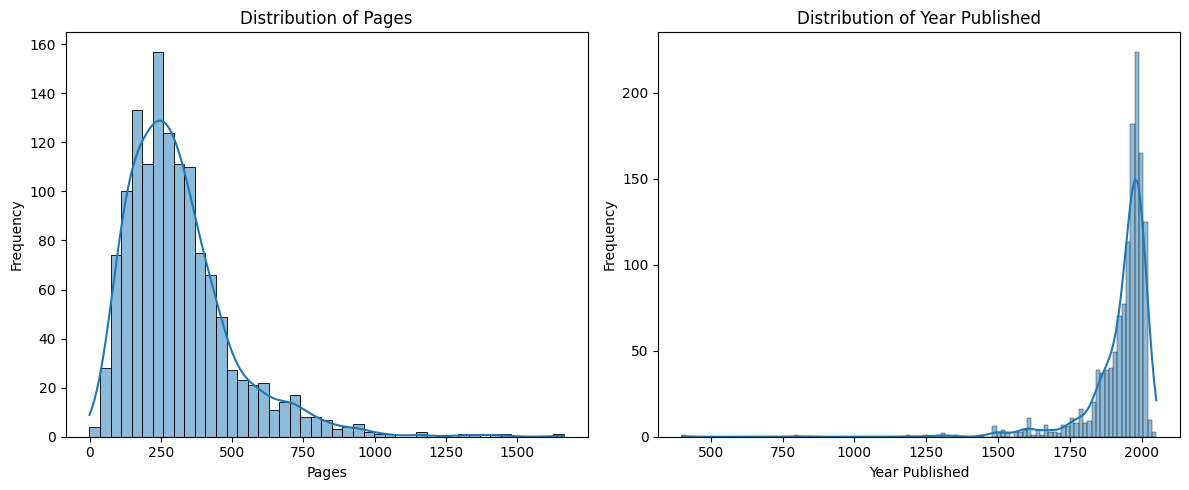

In [150]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Pages'].dropna(), kde=True)
plt.title('Distribution of Pages')
plt.xlabel('Pages')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['Year_Published'].dropna(), kde=True)
plt.title('Distribution of Year Published')
plt.xlabel('Year Published')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Berdasarkan visualisasi data menggunakan histogram untuk attribute Pages dan Year_Published:

- Distribusi Halaman Buku (Pages): Histogram untuk jumlah halaman buku menunjukkan distribusi yang miring ke kanan (right-skewed). Ini berarti mayoritas buku dalam dataset memiliki jumlah halaman yang relatif sedikit. Ada ekor panjang di sisi kanan histogram, yang mengindikasikan bahwa ada beberapa buku dengan jumlah halaman yang sangat tinggi, meskipun jumlahnya tidak banyak.
- Distribusi Tahun Terbit (Year_Published): Histogram untuk tahun terbit buku menunjukkan distribusi yang cenderung miring ke kiri (left-skewed). Ada puncak frekuensi yang jelas pada tahun-tahun yang lebih baru, terutama di sekitar akhir abad ke-20 dan awal abad ke-21. Ini menunjukkan bahwa koleksi buku yang paling banyak dipinjam atau tercatat dalam dataset ini adalah buku-buku yang diterbitkan dalam dekade-dekade terakhir. Ada juga sebaran yang lebih jarang di tahun-tahun terbit yang jauh lebih tua.

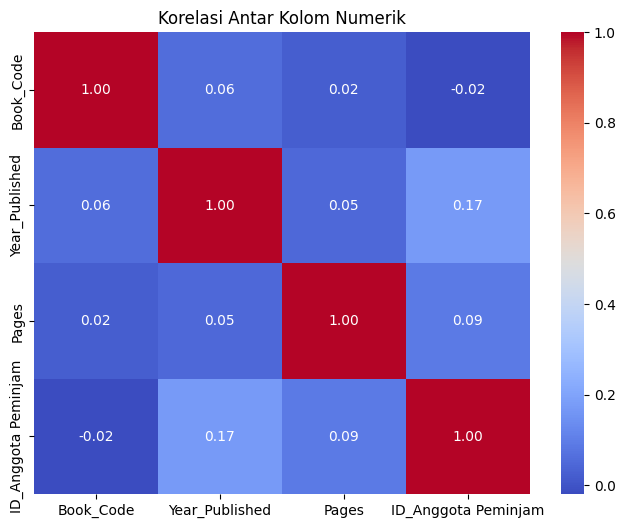

In [151]:
correlation_matrix = df[numerical_cols.columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Kolom Numerik')
plt.show()

Berdasarkan heatmap korelasi antar attribute numerik (Book_Code, Year_Published, Pages, dan ID_Anggota Peminjam), dapat disimpulkan sebagai berikut:

- Kekuatan Korelasi: Secara umum, nilai korelasi antar semua pasangan attribute numerik dalam dataset ini sangat rendah, mendekati nol. Ini ditunjukkan oleh warna pada heatmap yang cenderung berada di tengah skala warna (tidak terlalu merah atau biru).
- Arah Korelasi: Beberapa pasangan menunjukkan korelasi positif yang sangat lemah (misalnya, Year_Published dengan ID_Anggota Peminjam sekitar 0.17, Pages dengan ID_Anggota Peminjam sekitar 0.09). Korelasi positif yang lemah ini berarti bahwa seiring dengan peningkatan satu attribute, attribute lainnya cenderung sedikit meningkat juga, namun hubungannya sangat tidak kuat. Ada juga korelasi negatif yang sangat lemah (misalnya, Book_Code dengan ID_Anggota Peminjam sekitar -0.02), menunjukkan kecenderungan yang sangat kecil untuk salah satu nilai menurun saat yang lain meningkat.
- Interpretasi: Nilai korelasi yang rendah mendekati nol menunjukkan bahwa tidak ada hubungan linear yang signifikan atau kuat antara attribute-attribute numerik ini dalam dataset yang dianalisis. Sebagai contoh, jumlah halaman buku (Pages) tidak memiliki korelasi linear yang berarti dengan tahun terbit buku (Year_Published) atau kode buku (Book_Code). Ini mengindikasikan bahwa, berdasarkan data ini, kita tidak dapat memprediksi nilai satu attribute numerik secara linear hanya berdasarkan nilai attribute numerik lainnya.

## POSTTEST 3

**Data Cleaning**

**Handling missing value**

In [152]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Book_Code               0
Book_Title              3
Author                  0
Year_Published          0
Pages                   0
ID_Peminjaman           3
Tanggal_Peminjaman      0
Tanggal_Pengembalian    0
ID_Anggota Peminjam     5
Nama_Anggota            3
Alamat                  0
No.Telepon              3
dtype: int64


Output dari cell ini nunjukkin kalau sebelum dan sesudah dicek, jumlah baris datanya tetap 1318. Artinya, nggak ada baris data yang sama persis atau duplikat di dataset ini, jadi nggak ada yang dihapus.

**Handling missing value**

In [153]:
df.dropna(subset=['ID_Anggota Peminjam'], inplace=True)

for col in ['Book_Title', 'ID_Peminjaman', 'Nama_Anggota', 'No.Telepon']:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Book_Code               0
Book_Title              0
Author                  0
Year_Published          0
Pages                   0
ID_Peminjaman           0
Tanggal_Peminjaman      0
Tanggal_Pengembalian    0
ID_Anggota Peminjam     0
Nama_Anggota            0
Alamat                  0
No.Telepon              0
dtype: int64


/tmp/ipython-input-667298257.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


Output dari cell ini nunjukkin kalau setelah data yang kosong di kolom 'ID_Anggota Peminjam' dihapus barisnya dan data kosong di kolom-kolom 'Book\_Title', 'ID\_Peminjaman', 'Nama\_Anggota', serta 'No.Telepon' diisi dengan nilai yang paling sering muncul, sekarang sudah tidak ada lagi data yang kosong di seluruh kolom dataset (ditunjukkan dengan angka 0 di semua kolom pada output Missing values after handling).

**Handling duplicate value**

In [154]:
initial_rows = df.shape[0]
print(f"Number of rows before removing duplicates: {initial_rows}")
df.drop_duplicates(inplace=True)
rows_after_duplicates = df.shape[0]
print(f"Number of rows after removing duplicates: {rows_after_duplicates}")

Number of rows before removing duplicates: 1318
Number of rows after removing duplicates: 1318


Output dari cell ini nunjukkin kalau sebelum dan sesudah dicek, jumlah baris datanya tetap 1318. Artinya, nggak ada baris data yang sama persis atau duplikat di dataset ini, jadi nggak ada yang dihapus.

**Handling outlier**

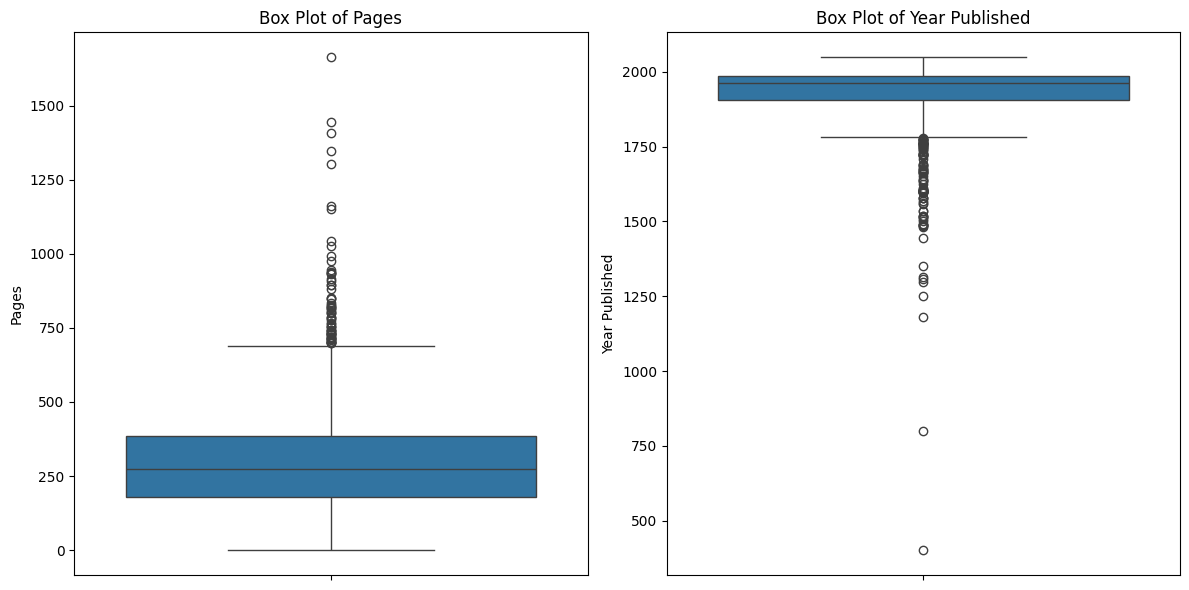

Number of rows before outlier removal: 1318
Number of rows after outlier removal: 1247


In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Pages'])
plt.title('Box Plot of Pages')
plt.ylabel('Pages')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Year_Published'])
plt.title('Box Plot of Year Published')
plt.ylabel('Year Published')

plt.tight_layout()
plt.show()

print(f"Number of rows before outlier removal: {df.shape[0]}")

Q1_pages = df['Pages'].quantile(0.25)
Q3_pages = df['Pages'].quantile(0.75)
IQR_pages = Q3_pages - Q1_pages
lower_bound_pages = Q1_pages - 1.5 * IQR_pages
upper_bound_pages = Q3_pages + 1.5 * IQR_pages

df_filtered = df[(df['Pages'] >= lower_bound_pages) & (df['Pages'] <= upper_bound_pages)].copy()

current_year = 2024
df_filtered = df_filtered[(df_filtered['Year_Published'] >= 1000) & (df_filtered['Year_Published'] <= current_year)].copy()


print(f"Number of rows after outlier removal: {df_filtered.shape[0]}")

df = df_filtered.copy()

Output dari cell ini nunjukkin kalau setelah menghapus data yang dianggap 'aneh' (outlier) di kolom 'Pages' dan 'Year_Published', jumlah baris data berkurang dari 1318 menjadi 1247. Ini berarti ada 71 baris data yang dihapus karena outlier.

**Normalisasi/standarisasi kolom numerik**

In [156]:
from sklearn.preprocessing import StandardScaler

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

display(df.head())

,Book_Code,Book_Title,Author,Year_Published,Pages,ID_Peminjaman,Tanggal_Peminjaman,Tanggal_Pengembalian,ID_Anggota Peminjam,Nama_Anggota,Alamat,No.Telepon
0,0.650205,The Confessions,Jean-Jacques Rousseau,-1.436949,2.344621,PB-2023-001,2024-09-05,2023-09-14,-1.707388,Felicity,Garibaldi Avenue,(021) - 428604
1,0.574448,The Art of Loving,Erich Fromm,0.258361,-0.996458,PB-2023-002,2024-09-05,2023-09-14,-1.741178,Melania,81 St,(021) - 428605
2,-1.463145,The Adventures of Huckleberry Finn,Mark Twain,-0.439138,0.034918,PB-2023-003,2024-09-05,2023-09-14,-1.748975,Magdalena,Elm Dr,(021) - 428606
3,-0.742150,My Life and Hard Times,James Thurber,0.035549,-1.221618,PB-2023-004,2024-09-05,2023-09-14,-1.746376,Anne-Marie,193 St,(021) - 428607
4,0.469956,Romeo and Juliet,William Shakespeare,-3.229134,-0.996458,PB-2023-005,2024-09-05,2023-09-14,-1.743777,Bettie,Fairchild Avenue,(021) - 428608


Output dari cell ini nunjukkin tampilan awal dataframe setelah kolom-kolom angka (Book_Code, Year_Published, Pages, ID_Anggota Peminjam diubah skalanya (dinormalisasi/distandardisasi) menggunakan StandardScaler jadi nilai-nilainya sekarang punya rata-rata mendekati 0 dan standar deviasi mendekati 1.

**Encoding kolom kategorikal**

In [156]:
object_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=object_cols, drop_first=True)
display(df.head())

Output dari cell ini nunjukkin tampilan awal dataframe setelah kolom-kolom teks (kategorikal) diubah jadi angka (0 atau 1) melalui proses one-hot encoding, yang bikin banyak kolom baru untuk setiap nilai unik di kolom teks aslinya.

**Feature engineering**

In [157]:
df['Tanggal_Peminjaman'] = pd.to_datetime(df['Tanggal_Peminjaman'])
df['Tanggal_Pengembalian'] = pd.to_datetime(df['Tanggal_Pengembalian'])
df['Loan_Duration_Days'] = (df['Tanggal_Pengembalian'] - df['Tanggal_Peminjaman']).dt.days
display(df[['Tanggal_Peminjaman', 'Tanggal_Pengembalian', 'Loan_Duration_Days']].head())

,Tanggal_Peminjaman,Tanggal_Pengembalian,Loan_Duration_Days
0,2024-09-05,2023-09-14,-357
1,2024-09-05,2023-09-14,-357
2,2024-09-05,2023-09-14,-357
3,2024-09-05,2023-09-14,-357
4,2024-09-05,2023-09-14,-357


Output dari cell ini nunjukkin 5 baris pertama dari kolom Tanggal_Peminjaman, Tanggal_Pengembalian, dan kolom baru Loan_Duration_Days yang dihitung dari selisih hari antara tanggal pengembalian dan tanggal peminjaman. Terlihat ada nilai negatif yang menandakan tanggal pengembalian lebih dulu dari tanggal peminjaman, yang perlu diperiksa.

**Splitting data ke dalam data training & data testing**

In [159]:
from sklearn.model_selection import train_test_split

X = df.drop(['Loan_Duration_Days', 'Tanggal_Peminjaman', 'Tanggal_Pengembalian'], axis=1)
y = df['Loan_Duration_Days']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (997, 6371)
Shape of X_test: (250, 6371)
Shape of y_train: (997,)
Shape of y_test: (250,)


Output dari cell ini nunjukkin ukuran (jumlah baris dan kolom) dari data setelah dipisah menjadi data latihan (X_train, y_train) dan data uji (X_test, y_test), yang siap dipakai buat bikin dan ngetes model.